In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

In [6]:
np.random.seed(42)
X, y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)

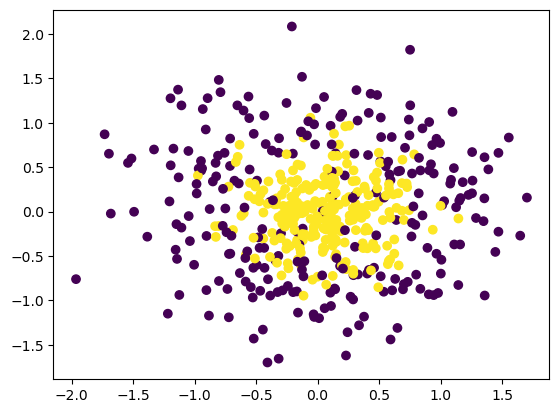

In [7]:
plt.scatter(X[:,0], X[:,1], c=y)

In [28]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
from sklearn.model_selection import cross_val_score
np.round(np.mean(cross_val_score(abc, X, y, cv=10, scoring='accuracy')),2)

0.79

In [9]:
abc.fit(X, y)

AdaBoostClassifier()

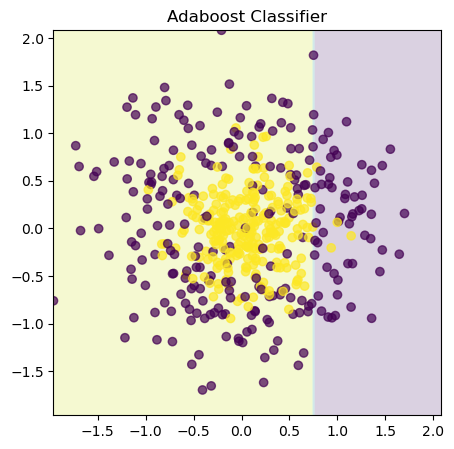

In [15]:
def plot_decision_boundary(clf):
    plt.figure(figsize=(5,5))
    x_range = np.linspace(X.min(), X.max(), 100)
    xx1, xx2 = np.meshgrid(x_range, x_range)
    y_hat = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    y_hat = y_hat.reshape(xx1.shape)
    plt.contourf(xx1, xx2, y_hat, alpha=0.2)
    plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
    plt.title("Adaboost Classifier")
    plt.show()
    
plot_decision_boundary(abc)

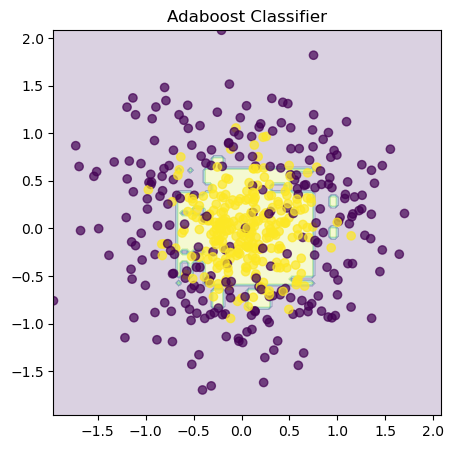

In [25]:
abc = AdaBoostClassifier(n_estimators=100)
abc.fit(X, y)
plot_decision_boundary(abc)

# Applying Grid SearchCV

In [26]:
from sklearn.model_selection import GridSearchCV
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]

In [27]:
grid_search = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy')

In [29]:
grid_search.fit(X, y)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'n_estimators': [10, 50, 100, 500]},
             scoring='accuracy')

In [30]:
grid_search.best_score_

0.8320000000000001

In [31]:
grid_search.best_estimator_

AdaBoostClassifier(learning_rate=0.01, n_estimators=500)

In [32]:
grid_search.best_params_

{'learning_rate': 0.01, 'n_estimators': 500}